In [1]:
import pandas as pd
import numpy as np


In [3]:
drinks=pd.read_csv("pandas_tut/dataset/drinks.csv")

In [4]:
drinks.shape

(193, 6)

In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [8]:
drinks.select_dtypes(exclude=['object']).head()       #to fetch same types of columns,we can use include and exclude

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


In [9]:
g=drinks.groupby('continent')

In [10]:
g

In [11]:
g.mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [12]:
g.describe()

beer_servings                                              \
                      count        mean        std   min     25%    50%   
continent                                                                 
Africa                 53.0   61.471698  80.557816   0.0   15.00   32.0   
Asia                   44.0   37.045455  49.469725   0.0    4.25   17.5   
Europe                 45.0  193.777778  99.631569   0.0  127.00  219.0   
North America          23.0  145.434783  79.621163   1.0   80.00  143.0   
Oceania                16.0   89.687500  96.641412   0.0   21.00   52.5   
South America          12.0  175.083333  65.242845  93.0  129.50  162.5   

                             spirit_servings              ...    \
                  75%    max           count        mean  ...     
continent                                                 ...     
Africa          76.00  376.0            53.0   16.339623  ...     
Asia            60.50  247.0            44.0   60.840909  ...     
Europe         270.00  361.0            45.0  132.555556  ...     
North America  198.00  285.0            23.0  165.739130  ...     
Oceania        125.75  306.0            16.0   58.437500  ...     
South America  198.00  333.0            12.0  114.750000  ...     

              total_litres_of_pure_alcohol       wine_servings              \
                                       75%   max         count        mean   
continent                                                                    
Africa                               4.700   9.1          53.0   16.264151   
Asia                                 2.425  11.5          44.0    9.068182   
Europe                              10.900  14.4          45.0  142.222222   
North America                        7.000  11.9          23.0   24.521739   
Oceania                              6.150  10.4          16.0   35.625000   
South America                        7.375   8.3          12.0   62.416667   

                                                           
                     std  min   25%    50%     75%    max  
continent                                                  
Africa         38.846419  0.0   1.0    2.0   13.00  233.0  
Asia           21.667034  0.0   0.0    1.0    8.00  123.0  
Europe         97.421738  0.0  59.0  128.0  195.00  370.0  
North America  28.266378  1.0   5.0   11.0   34.00  100.0  
Oceania        64.555790  0.0   1.0    8.5   23.25  212.0  
South America  88.620189  1.0   3.0   12.0   98.50  221.0  

[6 rows x 32 columns]

In [16]:
drinks[(drinks.continent=="Africa") & (drinks.beer_servings==drinks.beer_servings.max())]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa


In [17]:
drinks[(drinks.continent=="Africa") & (drinks.beer_servings==drinks.beer_servings.min())]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
97,Libya,0,0,0,0.0,Africa
107,Mauritania,0,0,0,0.0,Africa
158,Somalia,0,0,0,0.0,Africa


In [19]:
drinks.loc[drinks[drinks.continent=="Africa"].beer_servings.argmax()]

country                         Namibia
beer_servings                       376
spirit_servings                       3
wine_servings                         1
total_litres_of_pure_alcohol        6.8
continent                        Africa
Name: 117, dtype: object

In [20]:
drinks.groupby('continent').beer_servings.min()

continent
Africa            0
Asia              0
Europe            0
North America     1
Oceania           0
South America    93
Name: beer_servings, dtype: int64

In [21]:
drinks[drinks.continent=="Africa"].beer_servings.mean()        

61.471698113207545

In [26]:
drinks[drinks.continent=="Africa"].agg(['mean'])

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
mean,61.471698,16.339623,16.264151,3.007547


In [27]:
drinks.groupby('continent').country.count()

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: country, dtype: int64

In [28]:
drinks.groupby('continent').agg('count')[['country']]

,country
continent,
Africa,53
Asia,44
Europe,45
North America,23
Oceania,16
South America,12


In [29]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [32]:
drinks.groupby('continent').beer_servings.describe(percentiles=None)

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


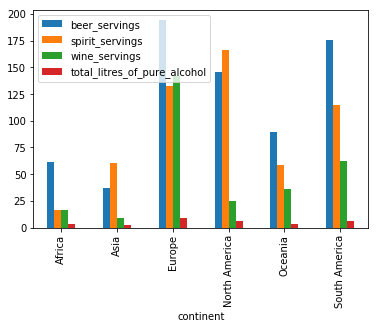

In [35]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')